# **Collaborative Filtering 🤝**

**Collaborative filtering** is a technique used in **machine learning** and **recommender systems** to make **predictions or recommendations** about a **user's interests** or **preferences by collecting preferences** or **information from multiple users**. It's based on the idea that people who have **agreed in the past tend to agree again in the future.**

There are **two main types of collaborative filtering**:

1. **User-based collaborative filtering:** This method identifies **similar users** based on their **preferences and recommends items** that **similar users have liked**.
 > For instance, if **users A and B** have **similar tastes** and **user A liked an item that user B hasn’t seen yet**, the **system might recommend** that item to **user B**.

2. **Item-based collaborative filtering:** Instead of **comparing users**, this approach looks at the **similarities between items themselves**. If a user **likes item X**, the **system will recommend items** that are **similar to item X** based on other **users’ preferences.**

 > So, if users who liked **item X** also **liked item Y**, the system might **suggest item Y** to someone who liked **item X**.

Both methods rely on a **matrix** of **user-item interactions** (like ratings, clicks, purchases, etc.) and use this information to **find patterns** or **similarities** between **users or items**, ultimately **making predictions or recommendations based on those patterns.**

However, collaborative filtering has some limitations, such as the cold-start problem (difficulty in providing recommendations for new users or items with limited data) and scalability issues with large datasets. Various techniques like matrix factorization, singular value decomposition (SVD), and deep learning approaches have been developed to address these challenges and improve the accuracy and efficiency of collaborative filtering systems.


----

Let's delve into an **example of similarity-based collaborative filtering** using a **movie recommendation scenario**. In this case, we'll employ the **user-based collaborative filtering technique**.

Consider a **simplified dataset** representing **movie ratings** by users:

```
User    | Movie A | Movie B | Movie C | Movie D | Movie E
-------------------------------------------------------
User 1  |   5     |    4    |         |    3    |    2
User 2  |         |    5    |    4    |    3    |    4
User 3  |   4     |         |    3    |         |    5
User 4  |         |    3    |         |    4    |    5
User 5  |   2     |    3    |    4    |         |
```

Here, users have **rated different movies** on a scale of **1 to 5** (blank cells indicate **no rating**). To predict how **User 5** might rate **"Movie C,"** we'll employ **user-based collaborative filtering** using **similarity measures** (e.g., **cosine similarity**).

### Steps:

1. **Compute Similarity:**
   - Calculate similarity between User 5 and other users (1, 2, 3, 4) based on their ratings for common movies.
   - Using cosine similarity, let's assume User 1 and User 3 are most similar to User 5.

2. **Predict Rating:**
   - Weight the ratings of User 1 and User 3 for "Movie C" based on their similarity to User 5.
   - Suppose User 1 rated "Movie C" with a score of 4 and User 3 rated it with a score of 3.
   
3. **Combine Ratings:**
   - Combine these ratings, weighted by the similarity scores between User 5 and Users 1 & 3.
   - A weighted combination might yield a predicted rating of 3.5 for "Movie C" by User 5.

This process is a **simplistic representation** of **similarity-based collaborative filtering**, where predictions for a **user's preferences** or **ratings** for **unrated items** are made by considering the **preferences of similar users**. In practice, more **sophisticated algorithms** and **larger datasets** are used for **accurate predictions and recommendations.**

Other approaches like **item-based collaborative filtering** involve **calculating similarity between items rather than users**, and they **function similarly** but on a **different axis—predicting** how much a user might like an **item based on their previous ratings of similar items.**

By leveraging these **similarity-based techniques**, **recommendation systems** can **offer personalized suggestions**, enhancing **user experiences** across **various domains**.

# **Environmental Setup 🌏**

Prepare for the creation of a **movie recommendation** system using **collaborative filtering**. To begin, we'll utilize **Python libraries** like **Pandas** for **data handling and NumPy for numerical operations**.

Setting **constants, hyperparameters**, and **ensuring reproducibility** through controlled **randomness** will establish a **robust foundation** for **our analysis**.

In [1]:
# Common Imports
import numpy as np

# Data Imports
import pandas as pd

# Data visualization
import plotly.express as px

# Cosine Similarity Computation
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Setting the seed to the magic number
np.random.seed(42)

# **Data Loading & exploration ⏬**

Data serves as **the backbone of collaborative filtering**, forming the **cornerstone for our recommendation system**.

This section prioritizes the meticulous process of **data loading**, aiming to provide a **comprehensive understanding of the dataset's structure** and **characteristics**. Our focus lies in initiating this phase by **loading the dataset**, followed by a **descriptive overview that emphasizes a statistical exploration—providing insights into the dataset's composition, layout, and essential attributes**.

This phase doesn't entail an in-depth statistical analysis but rather aims to offer a preliminary understanding of the **data's nature**, facilitating **subsequent stages** of our **collaborative filtering model development**.

In [4]:
# Set the file path
file_path = "./ratings_small.csv"

# Load the data
df = pd.read_csv(file_path)

# Remove unnecessart feature
df.drop(columns = ['timestamp'], inplace = True)

# Quick look at the data
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
# Collect the data information
feature_names = df.columns

print(f"Total number of features: {len(feature_names)}")

Total number of features: 3


The dataset comprises **three key attributes**: the **user ID**, representing **individual users**; the **movie ID**, **uniquely identifying each movie**; and the **user-assigned rating** for a **given movie**.

These elements form **the essential components** defining our dataset, pivotal for **collaborative filtering** and **recommendation system construction.**

In [6]:
# Check for the presence of null values
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

Fortunately, **the dataset** is **devoid** of **any null values**, sparing us the **need for imputation**. This **absence of missing data** allows us to **bypass the imputation process entirely**, enabling us to **seamlessly proceed with subsequent data operations** and **analyses without interruption.**

In [7]:
# Calculate the total number of data points
n_samples = df.shape[0]

print(f"Total number of samples: {n_samples}")

Total number of samples: 100004


In totality, our dataset comprises an **impressive count** of **data samples** or **data points**, tallying up to **100,004 entries.** This **substantial volume of data** sets a **solid foundation**, **promising precise and accurate results** in the **development and implementation of our recommendation system and collaborative filtering techniques**.

This extensive dataset bodes well for **fostering robust** and **reliable outcomes** in our analysis and **modeling endeavors**.

In [8]:
df.userId.value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

The **dataset boasts 671 distinct users identified by their user IDs**. While this **count appears relatively modest** considering our **substantial volume of 100,004 data samples**, it illuminates an **intriguing aspect**: a varied distribution in the **number of reviews per user**.

Observing this **disparity—ranging from users contributing 20 reviews to others surpassing 2000+ or more**—highlights a **diverse representation** within our **dataset**. Although the **user count may seem lower than anticipated** considering the **overall data volume**, the **existing diversity** is **promising for our analyses**.

Despite the potential for **more unique users**, the **dataset's substantial size** already offers a **comprehensive and diverse representation,** affording a **robust foundation for our subsequent data processes.**

In [9]:
# Total number of unique movies
n_unique_movies = len(df.movieId.unique())

print(f"Number of unique movies: {n_unique_movies}")

Number of unique movies: 9066


The dataset comprises **9,066 unique movies**, a **seemingly moderate count at first glance**. However, this **actually aligns quite well** with **the principles of collaborative filtering and recommendation systems.**

These systems **hinge on understanding the user-item relationships**, where **similarities between user preferences dictate recommendations**. Having a **relatively low count of unique movies facilitates** this process. When **multiple users share a preference for specific movies**, the system can **accurately recommend those items to others with similar tastes**.

Despite the **vastness of the dataset**, this **ample collection of movies not only aids in comprehensive analyses** but also **reinforces the robustness** of our **recommendation system**.

The **extensive pool of unique movies enriches** our understanding of **user-item associations**, contributing significantly to the **accuracy and reliability of our collaborative filtering approach.**

# **Data Analysis 📊**

In the **prior section**, our exploration delved into the **mathematical and quantitative aspects of the dataset**. Now, we'll pivot towards analyzing the dataset from a **visual standpoint**, seeking insights through **graphical representations** and **visual properties inherent in the data**.

In [10]:
data = df.userId.value_counts()

# Visualization for the user interactions
fig = px.histogram(
    data,
    title = "Histogram of Users Interactions"
)
fig.update_layout(
    xaxis_title = "User",
    yaxis_title = "User Interactions"
)
fig.show()

The **histogram vividly illustrates** a notable trend: a majority of users have interacted with a **limited number of movies**, indicating a **narrower range of preferences**. This observation bodes well for the **recommendation system**, as it suggests that **many users might benefit** from **diverse recommendations**.

However, contrasting this trend, there's a **distinct subset** of users who've **significantly engaged** with an **extensive catalog of movies**, exceeding **2000 interactions**. Although the number of such users is **extremely low**.

# **User - Item Matrix 🌟**

In [11]:
# Matrix for the user item interaction (User-item matrix)
interaction_matrix = df.pivot(index='userId', columns='movieId', values='rating')

interaction_matrix.shape

(671, 9066)

The shape of the **interaction matrix** is **671 x 9066**. Which makes sense because we had **671 users** and **9066 movie.**

In [12]:
# Quick look at the interaction matrix
interaction_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The prevalence of these **NaN values** aligns with our **earlier observation** in the **histograms**, where a **majority of users** displayed **limited interactions** with **movies**. This **pattern contributes** to the **substantial count** of **NaN values**, indicating **movies that users haven't engaged with yet**.

Interestingly, this is an **anticipated and acceptable** aspect within our dataset, particularly since certain users have **extensively interacted** with a **large number of movies**. These **highly active users** help **balance the impact of the NaN values, enriching our dataset's diversity.**

Moreover, **this scenario mirrors real-life behavior** quite accurately. **No individual has viewed every single movie available**; it's a **practical impossibility!** Similarly, our **dataset reflects this reality**, offering a **diverse array of movies** that users have **not yet interacted with**. This diversity presents an opportunity—despite **NaN values—enabling us to recommend a wide range of unexplored movies to respective users.**

---
Our next task is to obtain **the similarity score** for **each individual user**, and in order to do so, we first need to **replace all the NaN values with zeros.**

In [13]:
# Replace with 0
interaction_matrix.fillna(value=0, inplace = True)

# Quick confirmation
interaction_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Cosine Similarity 💯**

**Cosine similarity** is a metric used to measure the **similarity between two vectors**, typically in a **high-dimensional space**. It calculates **the cosine** of the **angle between these vectors**, indicating how **closely they align in direction**, regardless of their **magnitude**.

Mathematically, the cosine similarity between two vectors $A$ and $B$ can be represented as:

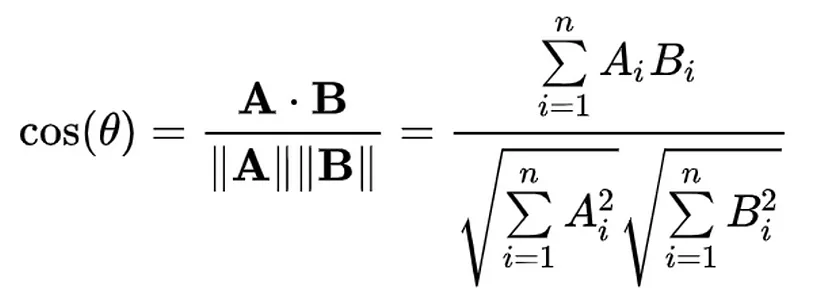

Where:
- $A • B$ denotes the dot product of vectors $A$ and $B$.
- $|A|$ and $|B|$ represent the **Euclidean norms** (or magnitudes) of vectors $A$ and $B$ respectively.

The **cosine similarity** value ranges between $-1$ and $1$:
- **1** indicates that the vectors have the same direction.
- **0** implies orthogonality (the vectors are perpendicular).
- **-1** signifies completely opposite directions.

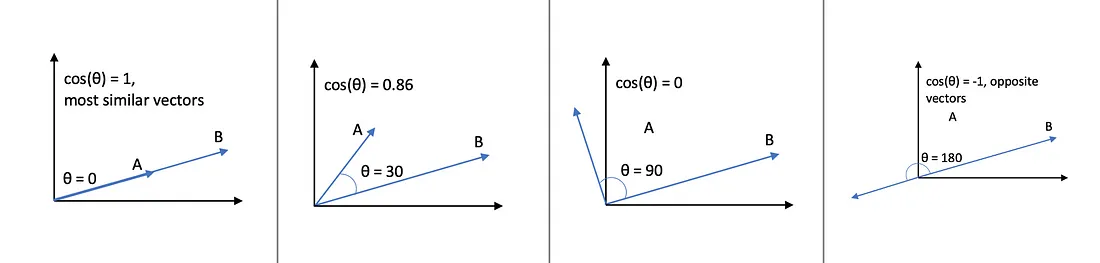

Read more here: [Cosine Similarity](https://towardsdatascience.com/cosine-similarity-how-does-it-measure-the-similarity-maths-behind-and-usage-in-python-50ad30aad7db)

In [35]:
def similarity_score(user_id, interaction_matrix=interaction_matrix, k=5):
    """
    Calculate the top-k most similar users to the given user_id based on cosine similarity.

    Parameters:
    - user_id: The ID of the user for whom similarity scores are calculated.
    - interaction_matrix: The matrix containing user-item interactions.
    - k: Number of similar users to retrieve (default is 5).

    Returns:
    - List of tuples containing user IDs and their corresponding cosine similarity scores.
    """

    # Compute the similarity of the current user with the rest of the users.
    similarities = [
        (
            user,
            cosine_similarity(
                [interaction_matrix.loc[user_id]],
                [interaction_matrix.loc[user]]
            )
        )
        for user in range(1, interaction_matrix.shape[0] + 1) if user != user_id
    ]

    # Sort based on the similarities
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Seperate users and similarity scores
    similar_users = [sim[0] for sim in similarities[:k]]
    users_scores = [sim[1] for sim in similarities[:k]]

    return similar_users, users_scores


In [38]:
# Users similar to the user id = 10.
similarity_score(10)

([271, 155, 206, 562, 550],
 [array([[0.26278749]]),
  array([[0.21706255]]),
  array([[0.20979643]]),
  array([[0.2058145]]),
  array([[0.20419486]])])

This tells us that for the **user id = 10** the **most similar** user is to **271** with a **score of 0.26.**

# **Recommendations 🎬**

We now have the **function to compute the similarities**. So now we can **create a function** that can provide the **recommendations to a specific user**.

In [46]:
def recommendations(user_id, n_recommendations=5, interaction_matrix=interaction_matrix):
    """
    Generate movie recommendations for a given user based on collaborative filtering.

    Parameters:
    - user_id: The ID of the user for whom recommendations are generated.
    - n_recommendations: Number of recommendations to provide (default is 5).
    - interaction_matrix: The matrix containing user-item interactions.

    Returns:
    - List of movie IDs recommended for the user.
    """

    # Retrieve the most similar users based on cosine similarity
    most_similar_users = [user for user, _ in similarity_score(user_id, k=20)]

    # Obtain movie IDs that the user has already interacted with
    movie_ids = set(interaction_matrix.columns[interaction_matrix.loc[user_id] > 0])

    recommendations = []
    already_seen = set()

    for user in most_similar_users:
        if len(recommendations) >= n_recommendations:
            break

        if user != user_id:
            # Fetch movie IDs of the similar user
            similar_user_movie_ids = set(interaction_matrix.columns[interaction_matrix.loc[user] > 0])

            # Add unique movies the user hasn't seen to recommendations
            new_recommendations = similar_user_movie_ids - movie_ids - already_seen
            recommendations.extend(new_recommendations)
            already_seen.update(new_recommendations)

    return list(recommendations)[:n_recommendations]


In [47]:
# Get the recomendation for user id = 10
recomendations(564)

[1537, 515, 1027, 2565, 524]

In [49]:
recomendations(671)

[1028, 4102, 1032, 3081, 3593]

Behold, behold! Here are the **recommendations** tailored for **User ID 564**, carefully curated using the **similarity-based Collaborative Filtering method**. This snippet presents **five recommendations**, meticulously crafted from **user interactions** and **preferences**.

But wait, the power of **collaborative filtering doesn't stop here!** Merge this approach with another user—let's say **User ID 671—and witness the magic of expanding recommendations across diverse user tastes.**

However, amidst its prowess, **Collaborative Filtering** has its **quirks and limitations**, occasionally stumbling upon **corner cases** that challenge its **accuracy**. These cases might emerge in scenarios where **users exhibit unique or outlier preferences**, affecting the **system's ability to predict recommendations accurately.**

Nonetheless, leveraging its strengths while being mindful of these **edge cases** is key to harnessing the **true potential of similarity-based Collaborative Filtering.**

---

A **notable corner case** arises when a **new user steps** into the **system**, devoid of **any interaction history**. In this scenario, the **absence of prior data** poses a challenge for traditional **Collaborative Filtering** approaches reliant on **user-item interactions**. To tackle this, an **astute recommendation strategy emerges**: a warm welcome through the top **three recommended movies**.

In [50]:
df.movieId.value_counts()[:3]

356    341
296    324
318    311
Name: movieId, dtype: int64

In this case, **the top three movies** are **356, 296 and 318.**

---
**DeepNets**